In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:

file_path = 'Mall_Customers.csv'  
df = pd.read_csv(file_path)

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
missing_values = df.isnull().sum()

In [6]:
missing_columns = missing_values[missing_values > 0]
print("Columns with missing values:")
print(missing_columns)

Columns with missing values:
Series([], dtype: int64)


In [31]:
def plot_distributions(data, features):
    plt.figure(figsize=(15, 6))
    for i, feature in enumerate(features, 1):
        plt.subplot(1, 3, i)
        sns.histplot(data[feature], bins=20, kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

def plot_violinplots(data, features, category):
    plt.figure(figsize=(15, 6))
    for i, feature in enumerate(features, 1):
        plt.subplot(1, 3, i)
        sns.violinplot(x=data[feature], y=data[category])
        plt.title(f'Violin Plot of {feature} by {category}')
    plt.tight_layout()
    plt.show()

def plot_countplot(data, category):
    plt.figure(figsize=(15, 6))
    sns.countplot(data=data, y=category)
    plt.title(f'Count Plot of {category}')
    plt.show()

def plot_age_distribution(data):
    age_bins = [(18, 25), (26, 35), (36, 45), (46, 55), (56, np.inf)]
    age_labels = ['18-25', '26-35', '36-45', '46-55', '55+']
    age_counts = [len(data[(data['Age'] >= low) & (data['Age'] <= high)]) for low, high in age_bins]

    plt.figure(figsize=(15, 6))
    sns.barplot(x=age_labels, y=age_counts, palette="mako")
    plt.title("Number of Customers in Age Groups")
    plt.xlabel("Age Group")
    plt.ylabel("Number of Customers")
    plt.show()

def plot_spending_score_distribution(data):
    score_bins = [(1, 20), (21, 40), (41, 60), (61, 80), (81, 100)]
    score_labels = ['1-20', '21-40', '41-60', '61-80', '81-100']
    score_counts = [len(data[(data['Spending Score (1-100)'] >= low) & (data['Spending Score (1-100)'] <= high)]) for low, high in score_bins]

    plt.figure(figsize=(15, 6))
    sns.barplot(x=score_labels, y=score_counts, palette="mako")
    plt.title("Distribution of Spending Scores")
    plt.xlabel("Spending Score Range")
    plt.ylabel("Number of Customers")
    plt.show()

def plot_annual_income_distribution(data):
    income_bins = [(0, 30), (31, 60), (61, 90), (91, 120), (121, 150)]
    income_labels = ["$0-30k", "$31-60k", "$61-90k", "$91-120k", "$121-150k"]
    income_counts = [len(data[(data['Annual Income (k$)'] >= low) & (data['Annual Income (k$)'] <= high)]) for low, high in income_bins]

    plt.figure(figsize=(15, 6))
    sns.barplot(x=income_labels, y=income_counts, palette="mako")
    plt.title("Annual Income Distribution")
    plt.xlabel("Income Range (k$)")
    plt.ylabel("Number of Customers")
    plt.show()

def perform_kmeans_clustering(data, features, n_clusters):
    X = data[features].values
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, init="k-means++")
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="*")
    plt.title("The Elbow Method")
    plt.xlabel("Number of Clusters")
    plt.ylabel("WCSS")
    plt.grid(True)
    plt.show()
    
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X)
    plt.figure(figsize=(15, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="rainbow", marker='o')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x')
    plt.title(f'Clusters of Customers (features: {features[0]} and {features[1]})')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.grid(True)
    plt.show()

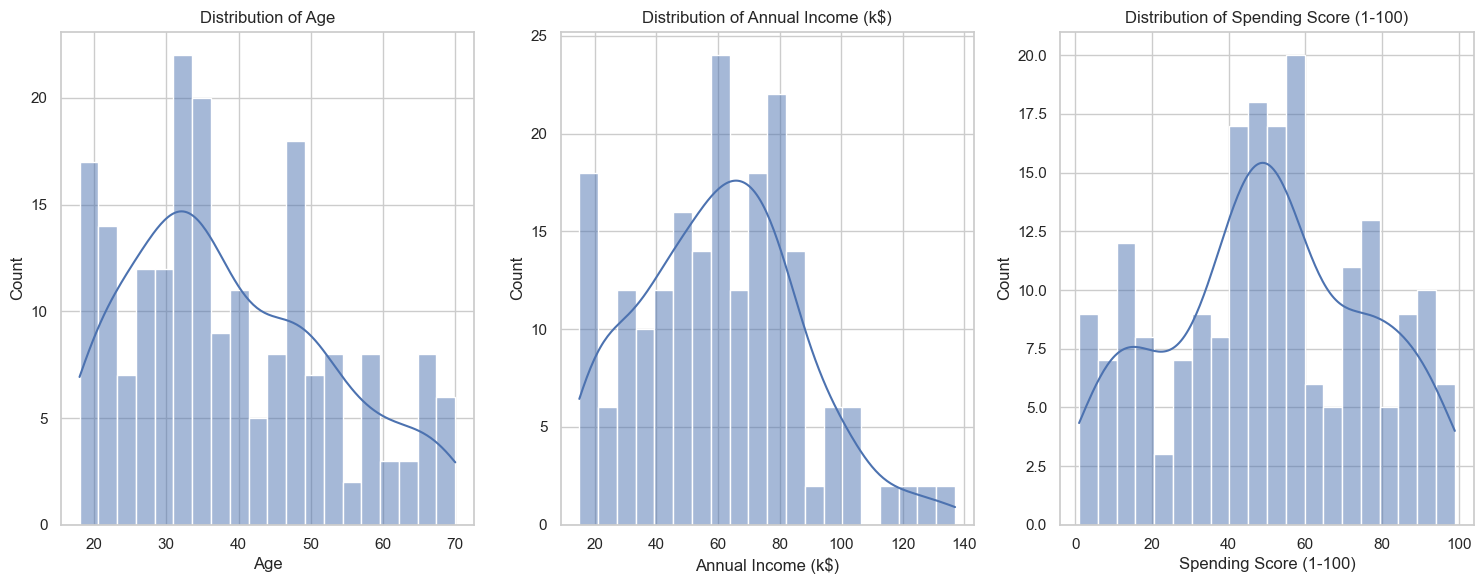

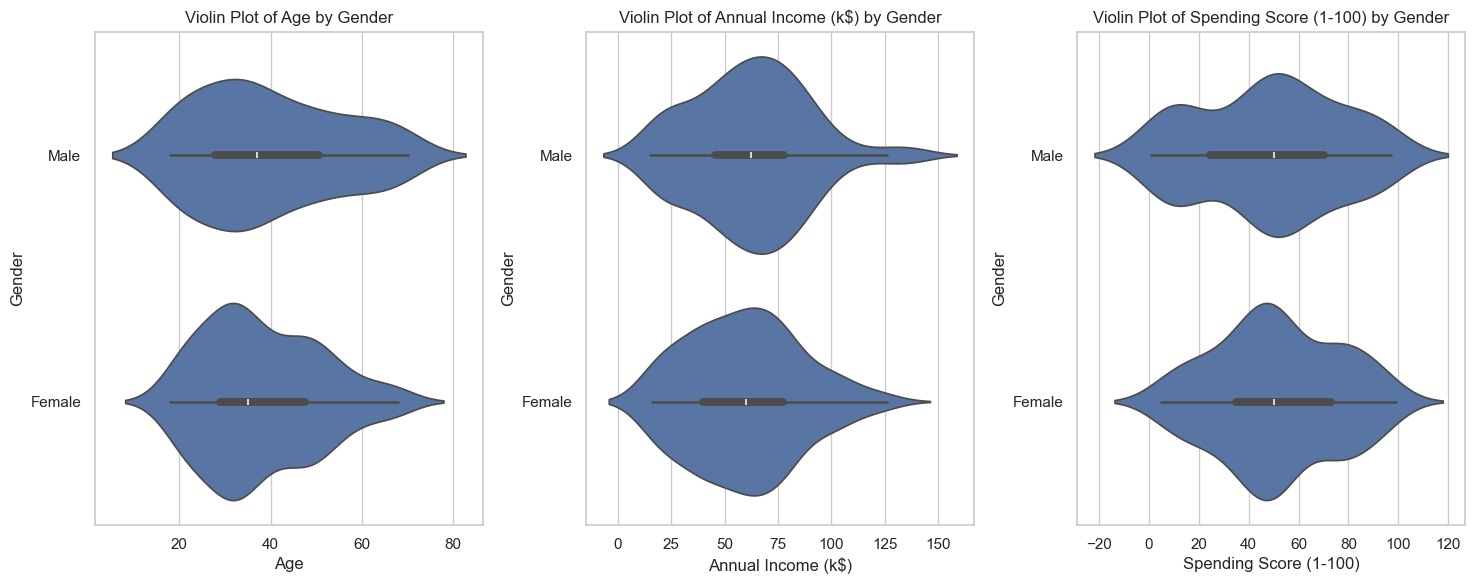

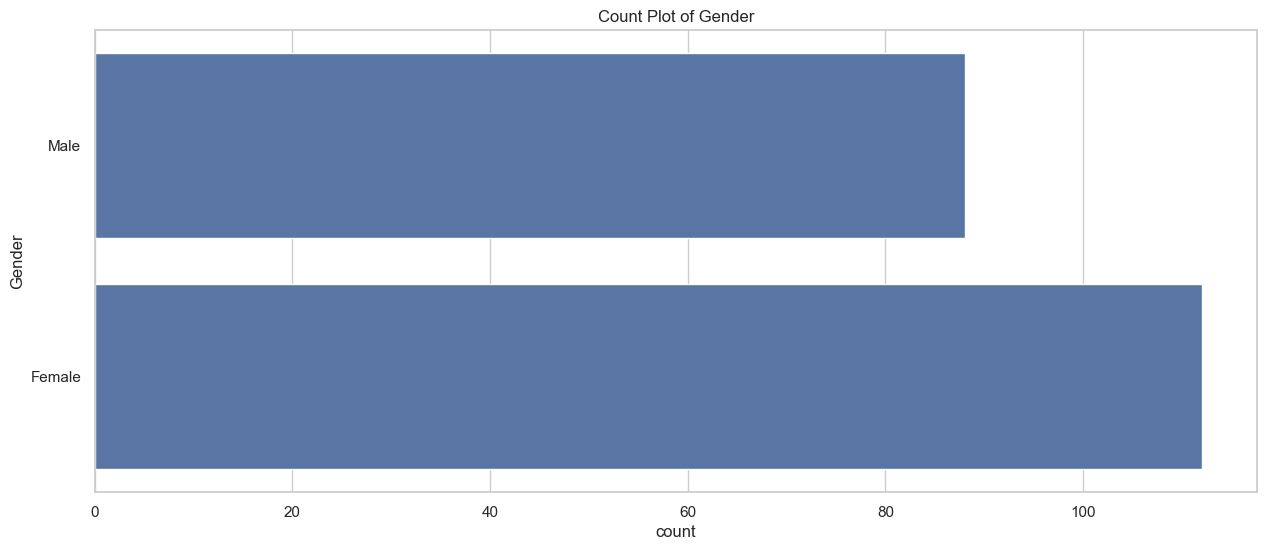

C:\Users\parim\AppData\Local\Temp\ipykernel_8200\1391298139.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_labels, y=age_counts, palette="mako")


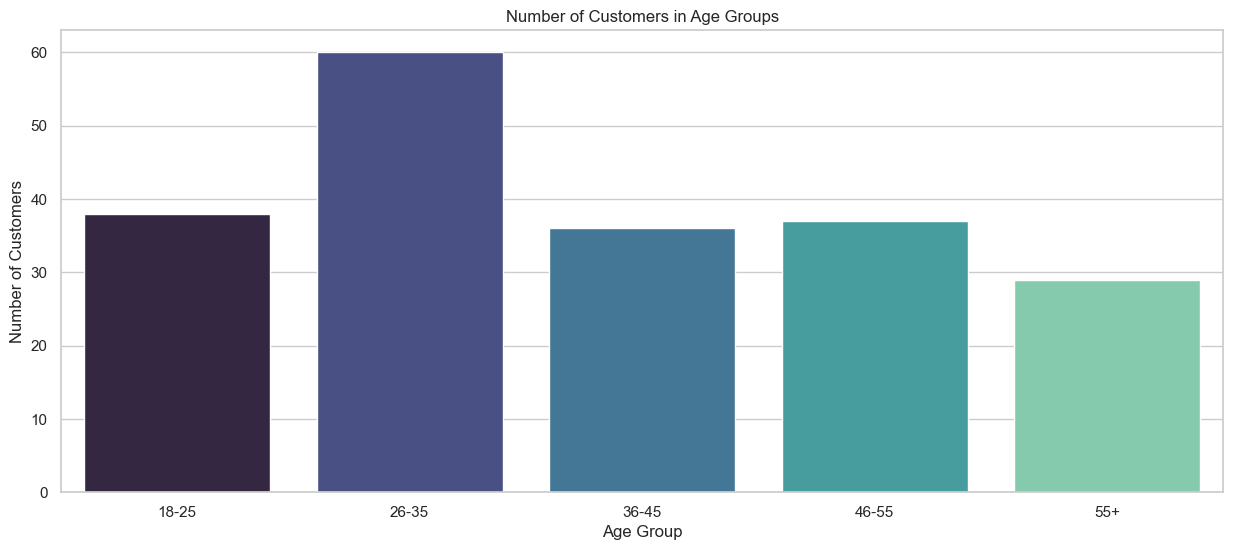

C:\Users\parim\AppData\Local\Temp\ipykernel_8200\1391298139.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_labels, y=score_counts, palette="mako")


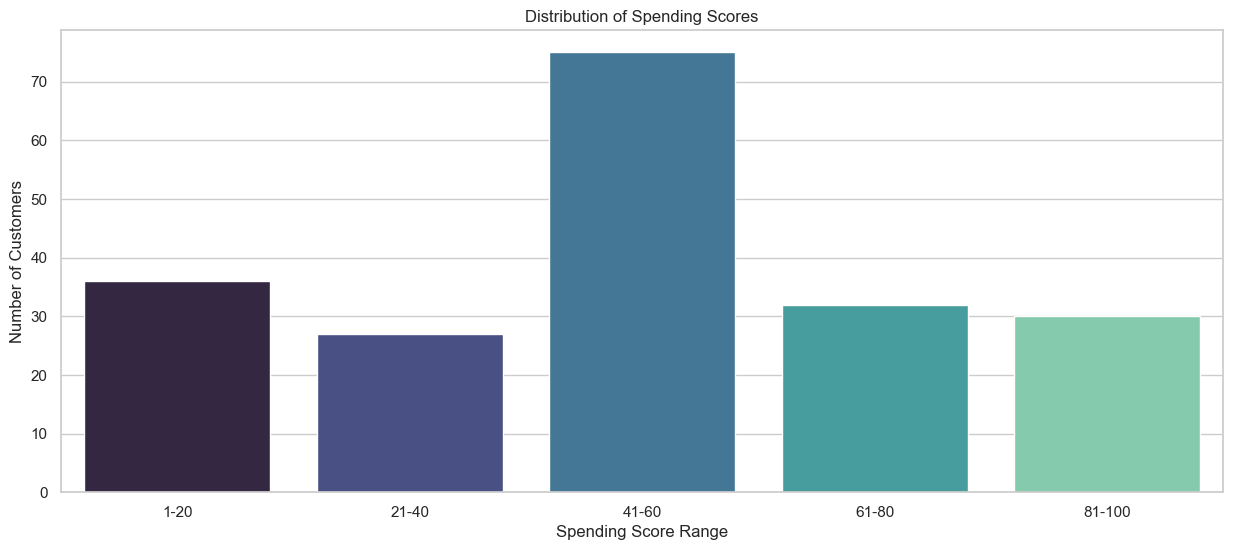

C:\Users\parim\AppData\Local\Temp\ipykernel_8200\1391298139.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_labels, y=income_counts, palette="mako")


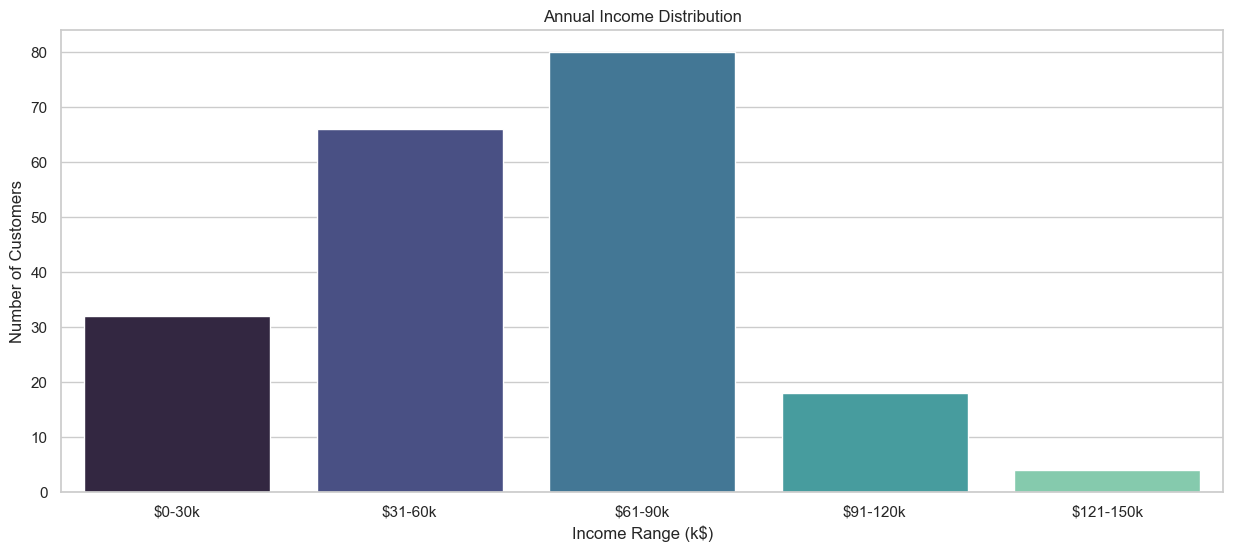

In [15]:

plot_distributions(df, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
plot_violinplots(df, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 'Gender')
plot_countplot(df, 'Gender')
plot_age_distribution(df)
plot_spending_score_distribution(df)
plot_annual_income_distribution(df)


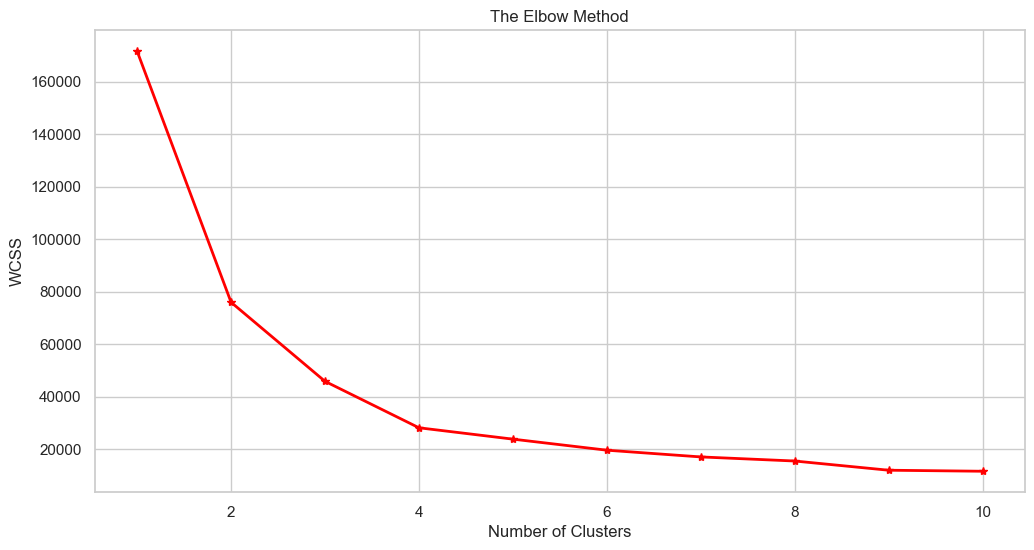

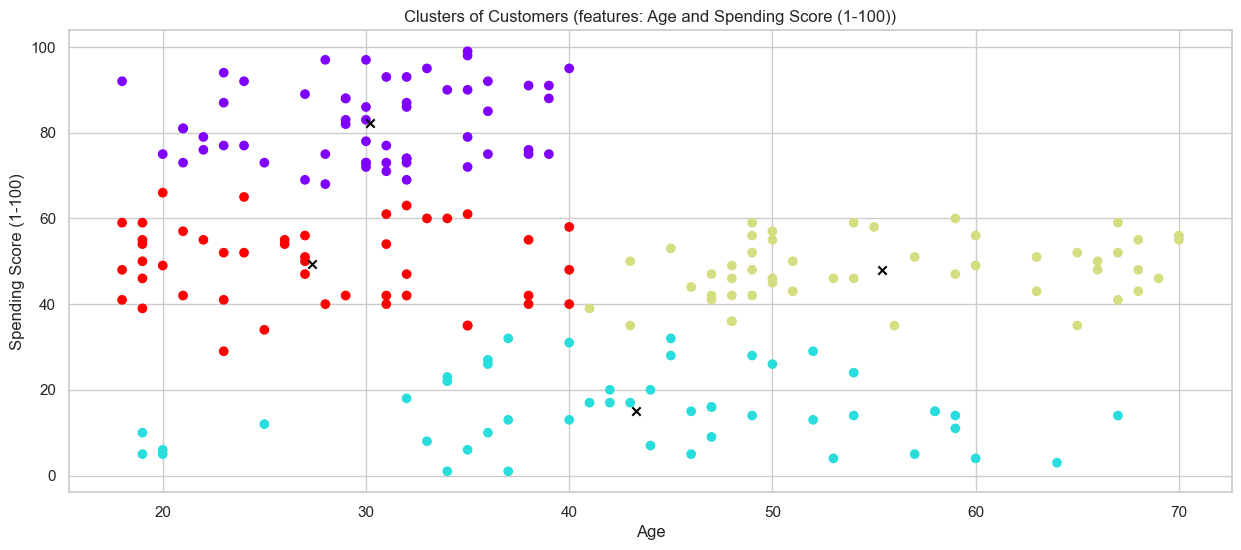

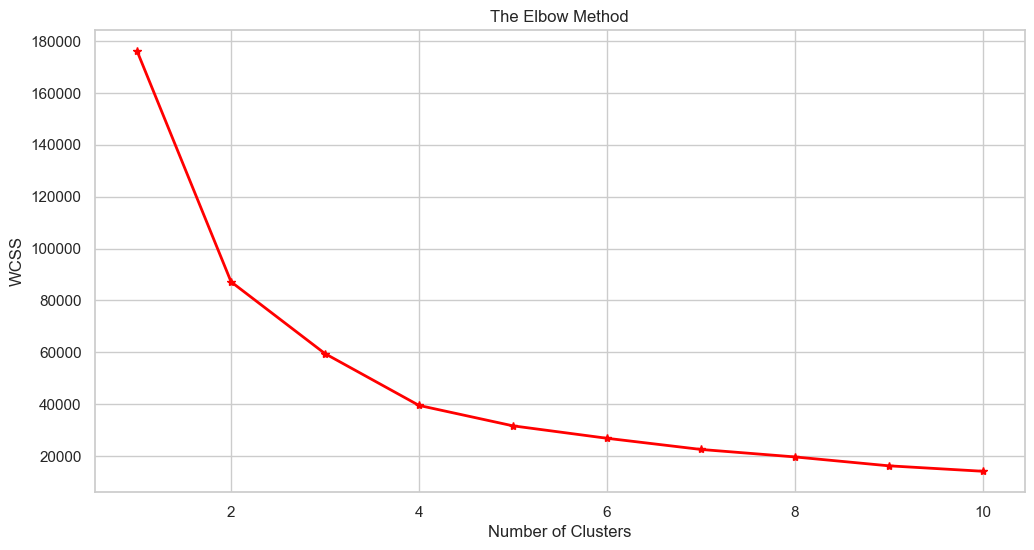

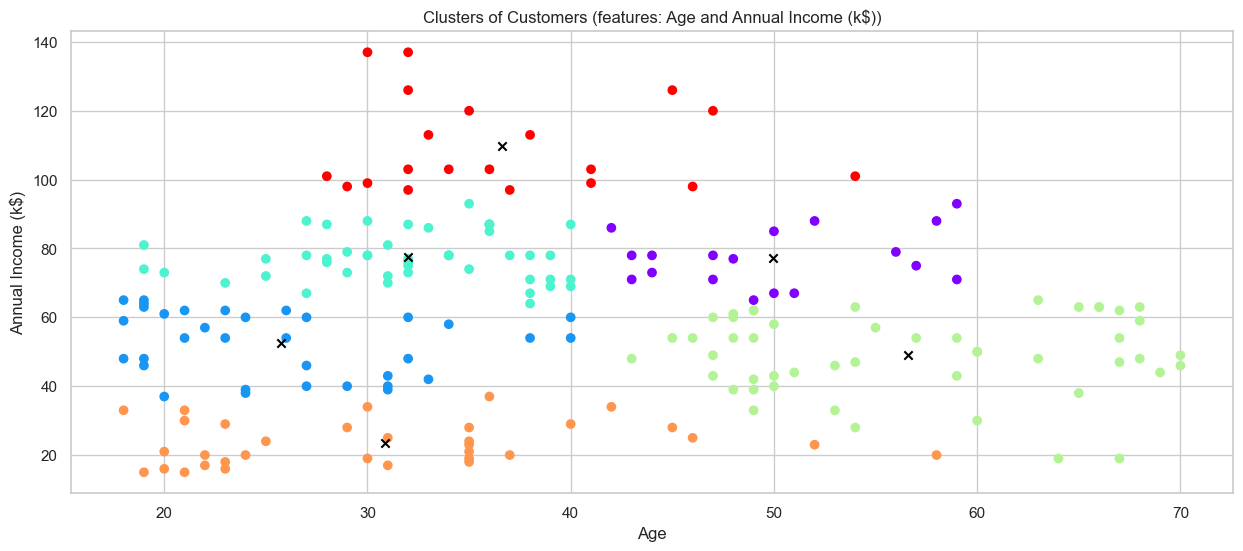

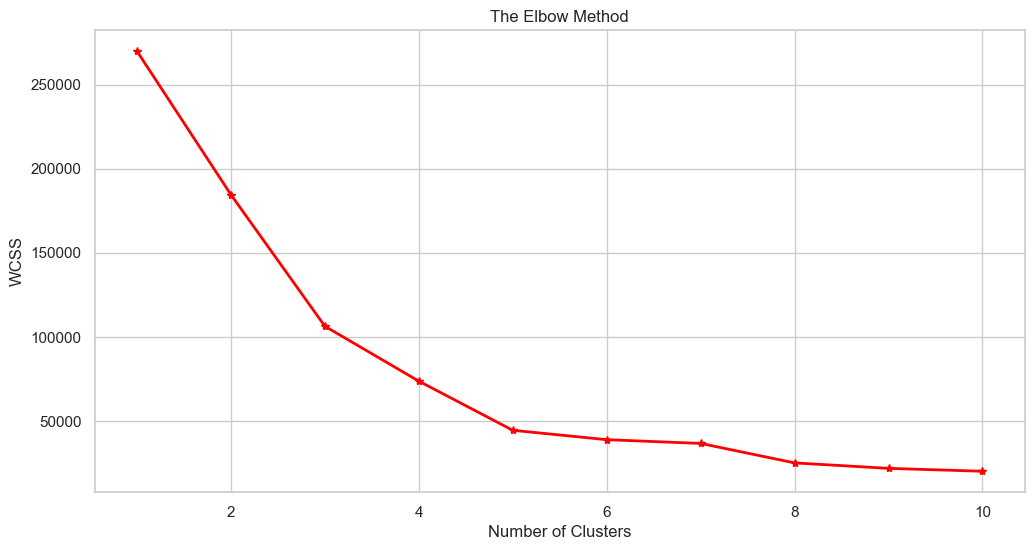

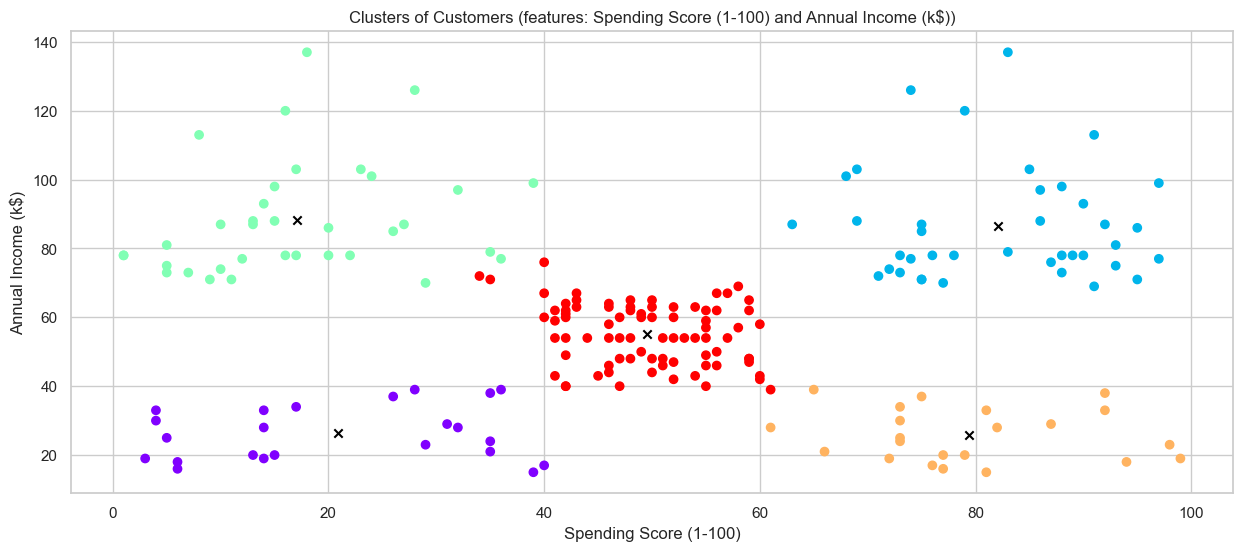

In [37]:
perform_kmeans_clustering(df, ['Age', 'Spending Score (1-100)'], 4)
perform_kmeans_clustering(df, ['Age', 'Annual Income (k$)'], 6)
perform_kmeans_clustering(df, ['Spending Score (1-100)', 'Annual Income (k$)'], 5)
